In [1]:
import glob
import matplotlib.pyplot as plt
from visualisations_utils import *
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In the cell below, you choose the input path, and the magnifications that you wish to visualise.
Because of the way the data is structured, it only makes sense to combine the following attributes:
- Input data:
    - "F" = field of view
    - "Z" = 3D z-number  (slice number or vertical position)
- Target data:
    - "F" = field of view
    - "A" = action list number (3 fluorescent + 1 brightfield action)

In [10]:
dataset_samples = glob.glob(os.path.join("valid", "*/*/Assay*"))
input_paths, target_paths = get_sample_paths(dataset_samples, ["40x", "20x"])
filtered_paths = filter_paths(target_paths, "A")

In [11]:
print(filtered_paths.keys())
print(filtered_paths['20x'].keys())
print(filtered_paths['40x'].keys())
print(filtered_paths['60x'].keys())

for k,v in filtered_paths["20x"].items():
    print(k, len(v), v[0])

dict_keys(['40x', '20x'])
dict_keys(['A01', 'A02', 'A03'])
dict_keys(['A01', 'A02', 'A03'])
dict_keys([])
A01 12 valid\targets\20x_images\AssayPlate_Greiner_#655090_B03_T0001F001L01A01Z01C01.tif
A02 12 valid\targets\20x_images\AssayPlate_Greiner_#655090_B03_T0001F001L01A02Z01C02.tif
A03 12 valid\targets\20x_images\AssayPlate_Greiner_#655090_B03_T0001F001L01A03Z01C03.tif


In [12]:
stats_dict = get_stats(filtered_paths)

40x
20x
60x


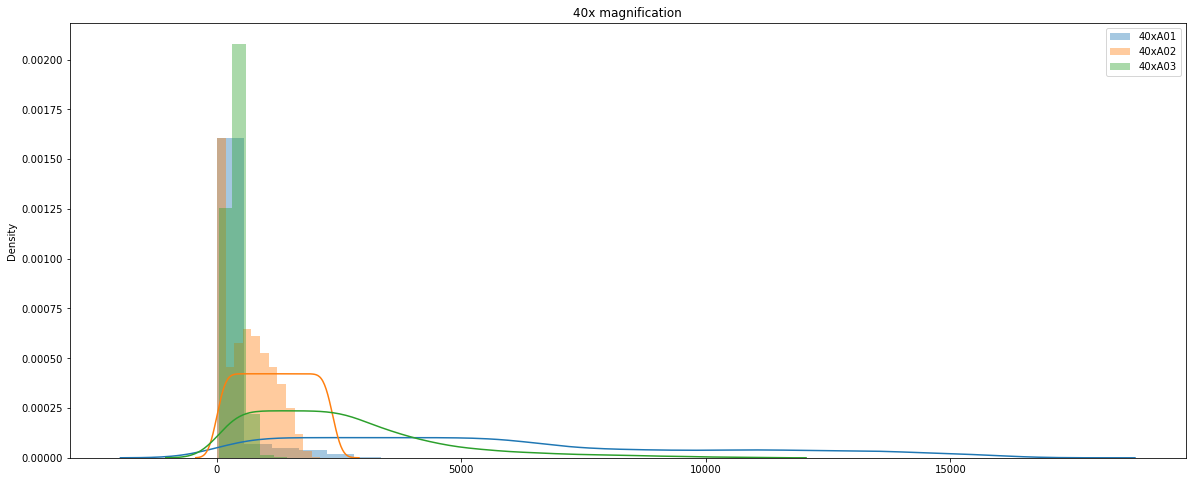

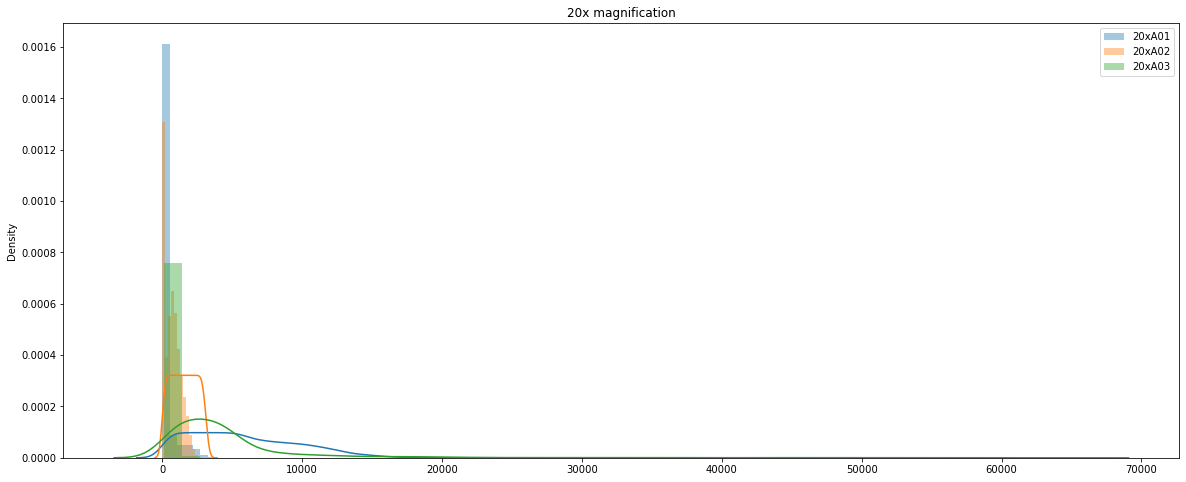

In [27]:
for mag in stats_dict.keys():
    plt.figure(figsize=(20,8))
    for key, val in stats_dict[mag].items():
        ax = sns.distplot(list(val.keys()), hist_kws={"weights":list(val.values())}, label = mag +" "+ key)
    ax.set_title(mag+" magnification")
    plt.legend()
